# Logistic Regression

## Learning goals

1. Compare predicting a continuous outcome to predicting a class
2. Compare linear to logistic regression as classification models
3. Understand how the sigmoid function translates the linear equation to a probability
4. Describe why logistic regression is a descriminative, parametric algorithm
5. Learn how to interpret a trained logistic model's coefficients
6. Explore the C (inverse regularization) paramater and hyperparameter tune
7. Learn how to adjust the threshold of a logistic model
8. Describe the assumptions of linear regression

# Why logistic 1st of our classifiers?

Logistic regression is a good model to usher us into the world of classification. It takes a concept we are familiar with, a linear equation, and translates it into a form fit for predicting a class.  

It generally can't compete with the best supervised learning algorithms, but it is simple, fast, and interpretable.  

As we will see in mod 4, it will also serve as a segue into our lessons on neural nets.

# 1. Compare predicting a continuous outcome to predicting a class

Thus far, we have worked to predict continuous target variables using linear regression. 

  - Continous target variables:
        - Sales price of a home
        - MPG of a car
        - Price of Google stock
        - Number of rides per day on the El
        - HS graduation rates
        
We will now transition into another category of prediction: classification. Instead of continous target variables, we will be predicting whether records from are data are labeled as a particular class.  Whereas the output for the linear regression model can be any number, the output of our classification algorithms can only be a value designated by a set of discrete outcomes.

  - Categorical target variables:
        - Whether an employee will stay at a company or leave (churn)
        - Whether a tumor is cancerous or benign
        - Whether a flower is a rose, a dandelion, a tulip, or a daffodil
        - Whether a voter is Republican, Democrat, or Independent
        
What are some other categorical target variables can you think of?

![discuss](https://media.giphy.com/media/l0MYIAUWRmVVzfHag/giphy.gif)



### We are still dealing with **labeled data**.

![labels](https://media.giphy.com/media/26Ff5evMweBsENWqk/giphy.gif)


This is still supervised learning. 

But now, instead of the label being a continuous value, such as house price, the label is the category.  This can be either binary or multiclass.  But we still need the labels to train our models.



In [1]:
from sklearn.datasets import load_iris

data = load_iris()
# Here, in our familiar iris dataset, we see that the target variable is one of three classes labeled 0, 1, 2 
# relating to setosa, versicolor, and virginica
print(data.target)
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


# 2. Compare linear to logistic regression as classification models


The goal of logistic regression, and any classification problem, is to build a model which accurately separates the classes based on independent variables.  

We are already familiar with how linear regression finds a best-fit "line".  It uses the MSE cost function to minimize the difference between true and predicted values.  

A natural thought would be to use that "line" to descriminate between classes: Everything with an output greater than a certain point is classified as a 1, everything below is classified as a 0.

# Glass Data
Take the glass data set from the UCI Machine Learning Dataset.  

It is composed of a set of features describing the physical makeup of different glass types.  

Glass types 1,2,3 represent window glass.
Glass types 4,5,6 represent household glass.

We will try to predict whether a record is window glass or household glass. 

In [2]:
# glass identification dataset
import pandas as pd
import numpy as np
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
# types 1, 2, 3 are window glass
# types 5, 6, 7 are household glass
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


Let's look at the relationship between aluminum content and glass type. 
There appears to be a relationship between the two, where more aluminum correlates with household glass. 

Text(0, 0.5, 'household')

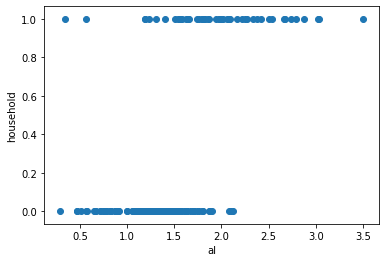

In [4]:
import matplotlib.pyplot as plt
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

We could fit a linear regression model to this data

In [5]:
from sklearn.linear_model import LinearRegression
# fit a linear regression model and store the predictions

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

lr = LinearRegression()
lr.fit(X, y)
glass['household_pred'] = lr.predict(X)

Text(0, 0.5, 'household')

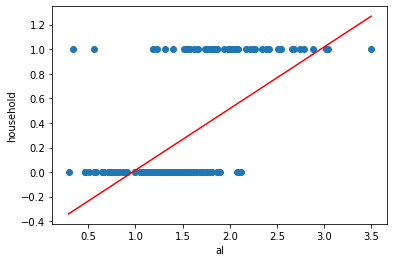

In [6]:
# scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

## What are some issues with the graph above?

![talk amongst yourselves](https://media.giphy.com/media/3o6Zt44rlujPePNVVC/giphy.gif)

In [8]:
# Let's see what happens if we have class imbalance.

from sklearn.linear_model import LinearRegression
# fit a linear regression model and store the predictions

feature_cols = ['al']

# Add data with high aluminum content associated with household glass
X_more = np.random.normal(4.5, .25, 20)
y_more = np.full(20, 1,)
y_aug = np.append(y, y_more)
X_aug = np.append(X['al'], X_more).reshape(-1,1)

In [9]:
# fit our regression
lr = LinearRegression()
lr.fit(X_aug, y_aug.reshape(-1,1))
y_hat = lr.predict(X_aug)


Text(0, 0.5, 'household')

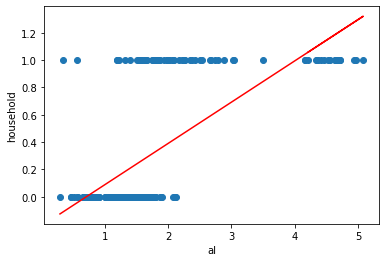

In [10]:
# The line is shifts dramatically with this outliers.
plt.scatter(X_aug, y_aug)
plt.plot(X_aug, y_hat, color='red')
plt.xlabel('al')
plt.ylabel('household')

Text(0, 0.5, 'household')

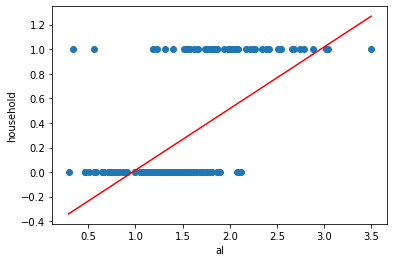

In [11]:
# Back to our original dataset

plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

We predict the 0 class for lower values of al, and the 1 class for higher values of al. What's our cutoff value? Around al=2, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if household_pred >= 0.5, we predict a class of 1, else we predict a class of 0.

If al=3, what class do we predict for household?

If al=1.5, what class do we predict for household?



In [12]:
# transform household_pred to 1 or 0
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


Text(0, 0.5, 'household')

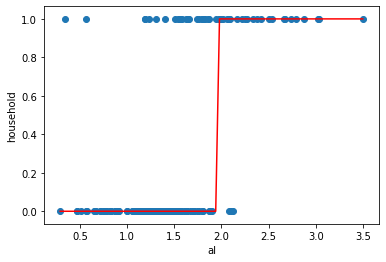

In [13]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

Text(0, 0.5, 'household')

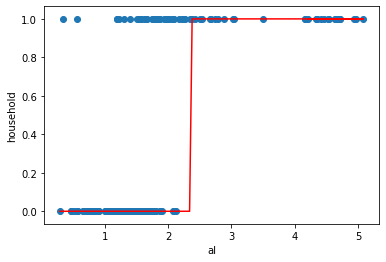

In [14]:
# With class imbalance

pred_class = np.where(y_hat >= 0.5, 1, 0)
np.unique(pred_class, return_counts = True)

# plot the class predictions
plt.scatter(X_aug, y_aug)
plt.plot(X_aug, pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

## How about we use logistic logistic regression instead?


Which performs a similar threshold decision

In [21]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'household')

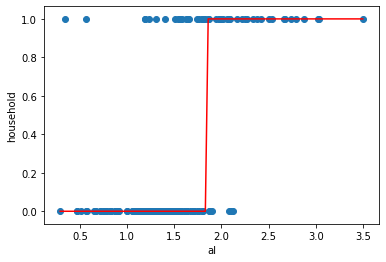

In [22]:
# plot the class predictions
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_class, color='red')
plt.xlabel('al')
plt.ylabel('household')

Not only do we have class predictions:

In [17]:
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_aug, y_aug)
log_aug_pred = logreg.predict(X_aug)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'household')

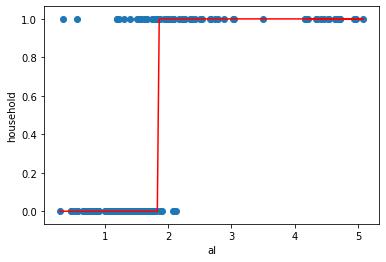

In [19]:
# plot the class predictions
plt.scatter(X_aug, y_aug)
plt.plot(X_aug, log_aug_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

# 3. Understand how the sigmoid function translates the linear equation to a probability

## Predict Proba

Let's take a closer look into what fitting the logistic model results in.

Along with the class predictions, we have probabilities associated with each record:

In [23]:
logreg.predict_proba(X)[:10]

array([[0.99850072, 0.00149928],
       [0.99815282, 0.00184718],
       [0.9968235 , 0.0031765 ],
       [0.9968235 , 0.0031765 ],
       [0.99624752, 0.00375248],
       [0.99537921, 0.00462079],
       [0.99537921, 0.00462079],
       [0.99497829, 0.00502171],
       [0.99328265, 0.00671735],
       [0.9929979 , 0.0070021 ]])

## Probabilities and the sigmoid functions
Here, we can start digging deeper into how logistic regression works.

The idea behind logistic regression is to model the conditional probability of a class given a set of independent features.

For the binary case, it is the probability of a 0 or 1 based on a set of independent features X.

$\Large P(G = 1|X = x)$

Since the total probability must be equal to 1:

$\Large P(G = 0|X = x) = 1 - P(G = 1|X = x)$ 

In order to realize such a goal, we have to somehow translate our linear output into a probability.  As we know, probability takes on a value between 0 and 1,  whereas the linear equation can output any value from $-\infty$ to $\infty$.

![sigmoid](https://media.giphy.com/media/GtKtQ9Gb064uY/giphy.gif)

In comes the sigmoid function to the rescue.


<img src='https://cdn-images-1.medium.com/max/1600/1*RqXFpiNGwdiKBWyLJc_E7g.png' />

If ‘Z’ goes to infinity, Y(predicted) will become 1 and if ‘Z’ goes to negative infinity, Y(predicted) will become 0.



Using the sigmoid function above, if X = 1, the estimated probability would be 0.8. This tells that there is 80% chance that this observation would fall in the positive class.



In [24]:
import numpy as np
def sigmoid(any_number):
    
    "Input any number, return a number between 0 and 1"
    
    return 1/(1+ np.e**(-any_number))
    

In your head, work through the approximate output of the function for:
  - z = 0
  - z = 1000
  - z = -1000

In [28]:
# Now, input numbers into the function to see that it is functioning correcting.

sigmoid(-100)

3.7200759760208555e-44

## Linking it to the linear equation

Now for the fun part.  The input of the sigmoid is our trusty old linear equation.

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2, x_2 +\ldots + \hat\beta_n x_n $$

The linear equation is passed into the sigmoid function to produce a probability between 0 and 1
$$\displaystyle\frac{1}{1+e^{-(\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n)}}$$

Remember, the goal of logistic regression is to model the conditional of a class using a transformation of the linear equation.

In other words:

$$\Large P(G = 1|X = x_1, x_2...x_n) = \frac{1}{1+e^{-(\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n)}}$$


Now, with some arithmetic:

You can show that, by multiplying both numerator and denominator by $e^{(\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n)}$


$$ \Large P(G = 1|X = x) = \displaystyle \frac{e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}{1+e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}$$

As a result, you can compute:

$$ \Large P(G = 0|X =x) = 1- \displaystyle \frac{e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}{1+e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}= \displaystyle \frac{1}{1+e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n}}$$


#### Odds ratio

This doesn't seem to be very spectacular, but combining these two results leads to an easy interpretation of the model parameters, triggered by the *odds*, which equal p/(1-p):

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$



$$ \Large \dfrac{ P(G = 1|X = x) }{P(G = 0|X =x)} = e^{\hat \beta_o+\hat \beta_1 x_1 + \hat \beta_2 x_2...\hat\beta_n x_n} $$

This expression can be interpreted as the *odds in favor of class 1*.  

Taking the log of both sides leads to:
<br><br>
    $\ln{\dfrac{ P(G = 1|X = x) }{P(G = 0|X =x)}} = \beta_0 + \beta_1*X_1 + \beta_2*X_2...\beta_n*X_n$
    
Here me can see why we call it logisitic regression.

Our linear function calculates the log of the probability we predict 1, divided by the probability of predicting 0.  In other words, the linear equation is calculating the **log of the odds** that we predict a class of 1.
    

# Pair
### Those are a lot of formulas to take in.  

To help us reinforce how logistic regression works, let's do an exercise where we reproduce the predicted probabilities by using our coefficients.  Below is model we fit above, predicting whether glass was window or household glass.


In [29]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['al']
X = glass[feature_cols]
y = glass.household
logreg.fit(X, y)
glass['household_pred_class'] = logreg.predict(X)
glass.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household,household_pred,household_pred_class
id,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,-0.340495,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,-0.315436,0
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,-0.250283,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,-0.230236,0


Just like linear regression, logistic regression calculates parameters associated with features and intercept. In the fit model above, we have one coefficient associated with aluminum, and one associate with the intercept.

In the cell below, use those coefficients along with the original data to calculate an array repressenting the logodds.

In [66]:
log_odds = None

In [30]:
#__SOLUTION__
log_odds = glass['al']*logreg.coef_[0] + logreg.intercept_
log_odds[:10]

id
22    -6.501267
185   -6.292247
40    -5.748795
39    -5.748795
51    -5.581579
184   -5.372558
110   -5.372558
158   -5.288950
153   -4.996322
104   -4.954518
Name: al, dtype: float64

Now, take that array, and feed it into the sigmoid function to get the probabilities of class 1.

In [33]:
#__SOLUTION__
p_1 = [sigmoid(log_odd) for log_odd in log_odds ]
p_1[:10]

[0.001499283754306628,
 0.0018471782647869125,
 0.0031764970973450386,
 0.0031764970973450386,
 0.0037524809806506985,
 0.00462078891149493,
 0.00462078891149493,
 0.0050217107557681195,
 0.006717347006863093,
 0.007002103481235093]

In [32]:
# Confirm that the output of predict_proba matches the probabilities you calculated
logreg.predict_proba(X)[:10]

array([[0.99850072, 0.00149928],
       [0.99815282, 0.00184718],
       [0.9968235 , 0.0031765 ],
       [0.9968235 , 0.0031765 ],
       [0.99624752, 0.00375248],
       [0.99537921, 0.00462079],
       [0.99537921, 0.00462079],
       [0.99497829, 0.00502171],
       [0.99328265, 0.00671735],
       [0.9929979 , 0.0070021 ]])

# 4. Describe why logistic regression is a descriminative, parametric algorithm


A decision boundary is a pretty simple concept. Logistic regression is a classification algorithm, the output should be a category: Yes/No, True/False, Red/Yellow/Orange. Our prediction function however returns a probability score between 0 and 1. A decision boundary is a threshold or tipping point that helps us decide which category to choose based on probability.

Logistic regression is a parametric, discriminative model.  

In other words, its decisions are made via trained parameters: our beta coefficients. The hyperplane that these coefficients define is a boundary by which we can discriminate between the classes.    

![](img/decision_boundary_2.jpg)

# 5. Interpreting Coefficients

What does our coefficient calculated above mean?

In [70]:
logreg.coef_

array([[4.18041341]])

**Interpretation:** A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'household'.

**Bottom line:** Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

# Note on optimizing the coefficients

Instead of optimizing the coefficients based on mean squared error, logistic regression looks to maximize the likelihood of seeing the probabilities given the class.

Because we are dealing with a binary outcome, our likelihood equation comes from the Bernouli distribution:

$$ \Large Likelihood=\prod\limits_{i=0}^N p_i^{y_i}(1-p_i)^{1-y_i}$$

Taking the log of both sides leads to the log_likelihood equation:

$$ \Large loglikelihood = \sum\limits_{i=1}^N y_i\log{p_i} + (1-y_i)\log(1-p_i) $$

The goal of MLE is to maximize log-likelihood.

Or, as we are generally look for minimums, we minimize the negative loglikelihood, which is our cost function:

$$ \Large negative\ loglikelihood = \sum\limits_{i=1}^N - y_i\log{p_i} - (1-y_i)\log(1-p_i) $$

When solving for the optimal coefficients of a logistic regression model, Log-Loss is the cost function that is used.


The general idea is to start with a set of betas, calculate the probabilities, calculate the log-likelihood, adjust the Betas in the direction of which gradient is heading towards higher likelihood.

There is no closed form solution like the normal equation in linear regression, so we have to use stocastic gradient descent.  To do so we take the derivative of the negative loglikelihood and set it to zero to find the gradient of the loglikelihood, then update our coefficients. Just like in linear regression SGD, we use a learning rate when updating them.


https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

http://wiki.fast.ai/index.php/Log_Loss

Here is a good Youtube video on MLE: https://www.youtube.com/watch?v=BfKanl1aSG0

Math behind the gradient of log-likelihood is ESL section 4.4.1: https://web.stanford.edu/~hastie/ElemStatLearn//.




# 6. Hyperparameter Tuning the C Variable

We have discussed 'L1' (lasso)  and 'L2' (ridge) regularization.  If you looked at the docstring of Sklearn's Logistic Regression function, you may have noticed that we can specify different types of regularization when fitting the model via the `penalty` parameter.

We can also specificy the strength of the regularization via the `C` parameter. `C` is the inverse regularization strength.  So, a low `C` means high regularization strength.

In [34]:
from sklearn.linear_model import LogisticRegression

# Ridge regularization with low strength
logr = LogisticRegression(penalty='l2', C=10**8)


In [35]:
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
logr = LogisticRegression(penalty='l2', C=10**8)
y = diabetes.Outcome
X = diabetes.drop("Outcome", axis=1)
logr.fit(X, y)

print(logr.coef_)
print(logr.intercept_)
print(logr.score(X,y))

[[ 1.23177935e-01  3.51615657e-02 -1.32961847e-02  6.19132214e-04
  -1.19155382e-03  8.96900770e-02  9.45111388e-01  1.48671964e-02]]
[-8.40389943]
0.7825520833333334


In [42]:
# Same result as 'none'
logr = LogisticRegression(penalty='none', C=10**8, max_iter=10000)
y = diabetes.Outcome
X = diabetes.drop("Outcome", axis=1)
logr.fit(X, y)

for coef, feature in zip(list(logr.coef_[0]), X.columns):
    print(round(coef,4), feature)
print(logr.intercept_)
print(logr.score(X,y))

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: penalty='none' is not supported for the liblinear solver

In [43]:
# With a high L2 regularization, the coefficients shrink.
logr = LogisticRegression(penalty='l2', C=.0001)
y = diabetes.Outcome
X = diabetes.drop("Outcome", axis=1)
logr.fit(X, y)

for coef, feature in zip(list(logr.coef_[0]), X.columns):
    print(round(coef,4), feature)
print(logr.intercept_)
print(logr.score(X,y))

0.0144 Pregnancies
0.0106 Glucose
-0.025 BloodPressure
-0.001 SkinThickness
0.0008 Insulin
-0.004 BMI
0.0004 DiabetesPedigreeFunction
0.0001 Age
[-0.00308795]
0.6770833333333334


In [44]:
# try with a strongL1. They are all shrunk to zero!
logr = LogisticRegression(penalty='l1', C=.0001, solver='liblinear')
y = diabetes.Outcome
X = diabetes.drop("Outcome", axis=1)
logr.fit(X, y)

for coef, feature in zip(list(logr.coef_[0]), X.columns):
    print(round(coef,4), feature)
print(logr.intercept_)
print(logr.score(X,y))

0.0 Pregnancies
0.0 Glucose
0.0 BloodPressure
0.0 SkinThickness
0.0 Insulin
0.0 BMI
0.0 DiabetesPedigreeFunction
0.0 Age
[0.]
0.6510416666666666


How do we choose between them? We iterate over possible parameters and judge the success based on our metric of choice.  We will eventually move towards grid search, which will help us be more thorough with our tuning.  For now, we will work through how to tune our C parameter with an Ridge regularization.

For now, let's judge on accuracy, which can be accessed via the `score()` method of a trained model.


In [34]:
# The parameters for C can be anything above 0.  
# Set up a list of possible values to try out.
# Start with 1000 numbers above 0
c_candidates = None


In [45]:
#__SOLUTION__
# The parameters for C can be anything above 0.  
# Set up a list of possible values to try out.
# Start with numbers above 0 up to 1000
c_candidates = np.linspace(1,1000,1000)
c_candidates = np.insert(c_candidates, 0, .0001)
c_candidates

array([1.00e-04, 1.00e+00, 2.00e+00, ..., 9.98e+02, 9.99e+02, 1.00e+03])

In [46]:
# Split your data into training and test data with a random state of 42 
# and a test size of .25
from sklearn.model_selection import train_test_split

# Your code here

In [47]:
#__SOLUTION__
# Split your data into training and test data with a random state of 42 
# and a test size of .25
X = diabetes.drop('Outcome', axis=1)
y = diabetes.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                    test_size=.25)

Since we are still getting used to train test split, let's now just put aside the test set and not touch it again for this lesson.

We will perform a second train test split on the train set, and hyperparameter tune our C on it.

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, 
                                                    test_size=.25)

In [49]:
# Train the no regularization logistic model on the train set, 
# and return the accuracy as measured on the test

logr = LogisticRegression(penalty='l2', C=10**8, max_iter=10000)
y = diabetes.Outcome
X = diabetes.drop("Outcome", axis=1)
logr.fit(X_train, y_train)

print(logr.coef_)
print(logr.intercept_)
print(logr.score(X_val,y_val))

[[ 0.02825815  0.03491504 -0.01469541  0.00272522 -0.001868    0.11724725
   0.87623515  0.03460531]]
[-9.36018542]
0.8263888888888888


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
# Create a for loop which runs through all of the possible values of C,
# fits the model on the train set, and scores the model on test set.
# Add the accuracies into a dictionary or a list, whichever you prefer
# Use 'l2'

c_scores = {}
for c in c_candidates:
    pass

best_c = max(c_scores, key=c_scores.get)
best_c
    

ValueError: max() arg is an empty sequence

In [51]:
#__SOLUTION__
# Create a for loop which runs through all of the possible values of C,
# fits the model on the train set, and scores the model on test set.
# Add the accuracies into a dictionary or a list, whichever you prefer
# Use 'l2'

c_scores = {}
for c in c_candidates:
    regr = LogisticRegression(penalty='l2', C=c, max_iter=10000)
    regr.fit(X_train, y_train)
    accuracy = regr.score(X_val, y_val)
    c_scores[c] = accuracy
    
# the best accuracy score comes with the highest regularization
best_c = max(c_scores, key=c_scores.get)
best_c
    

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

6.0

In [52]:
# Once you have the best C for the range of values between 0 and 1000,
# narrow in even further.  Choose a new range of 100 C-values between your best C
# and the next closer integer.
import math
c_candidates = np.linspace(math.floor(best_c)+.01,math.floor(best_c)+1, 100)

In [54]:
#__SOLUTION__
c_scores = {}
for c in c_candidates:
    regr = LogisticRegression(penalty='l2', C=c, max_iter=10000)
    regr.fit(X_train, y_train)
    accuracy = regr.score(X_val, y_val)
    c_scores[c] = accuracy
    
# the best accuracy score comes with the highest regularization
best_c = max(c_scores, key=c_scores.get)
print(best_c, c_scores[best_c])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

6.02 0.8263888888888888


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

We improved our accuracy score from .740 to .745. Not too much gain. 
Sometimes hyperparameter tuning can have a large effect, sometimes not. 
Don't rely on hyperparameter tuning to fix your model.  
Treat it as a necessary step in the process which if you are lucky, may increase the predictive power of your model.

In future lessons, we will use Grid Search to automate our hyperparamater tuning, and make it more thorough.


## 7. Threshold

Because logistic regression calculates the probability of a given class, we can easily change the threshold of what is categorized as a 1 or a 0.   

Let's use our best c from above, and use predict_proba() to output probabilities.

In [55]:
regr = LogisticRegression(penalty='l2', C=c)
regr.fit(X_train, y_train)
probas = regr.predict_proba(X_test)
probas

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.71857097, 0.28142903],
       [0.78587069, 0.21412931],
       [0.8600548 , 0.1399452 ],
       [0.83312951, 0.16687049],
       [0.58546185, 0.41453815],
       [0.5839833 , 0.4160167 ],
       [0.97751973, 0.02248027],
       [0.26056241, 0.73943759],
       [0.46752741, 0.53247259],
       [0.27122526, 0.72877474],
       [0.78295302, 0.21704698],
       [0.15113499, 0.84886501],
       [0.64879114, 0.35120886],
       [0.67209864, 0.32790136],
       [0.88814   , 0.11186   ],
       [0.54074031, 0.45925969],
       [0.83971789, 0.16028211],
       [0.91320574, 0.08679426],
       [0.12829174, 0.87170826],
       [0.37843579, 0.62156421],
       [0.80167565, 0.19832435],
       [0.90396818, 0.09603182],
       [0.55143833, 0.44856167],
       [0.87703462, 0.12296538],
       [0.51275446, 0.48724554],
       [0.14546269, 0.85453731],
       [0.8716826 , 0.1283174 ],
       [0.96334916, 0.03665084],
       [0.71598408, 0.28401592],
       [0.86639545, 0.13360455],
       [0.

In [56]:
y_hat = regr.predict(X_val)
y_hat

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

Compare the output of predict and predict proba. Write out below how the output of predict_proba is related to the predict output.  

In [51]:
#__SOLUTION__
"""The default threshold is .5. Any value in the predict_proba first column above .5 is categorized as a 0. 
Any value above .5 in the second column is categorized as 1."""

'The default threshold is .5. Any value in the predict_proba first column above .5 is categorized as a 0. \nAny value above .5 in the second column is categorized as 1.'

Now, isolate one of the columns of predict_proba, and create an area of booleans which returns True if the proba is above .4

In [333]:
# Your code here
lower_threshold = None

Then, use the astype method to convert the array to integers: True will become 1, and False will become 0

In [334]:
# Your code here

predictions = None

While the accuracy of the model will fall by increasing the threshold, we are protecting against a certain type of error. What type of error are we reducing? Think back to Type 1 and Type 2 errors. Why might protecting against such errors be smart in a model that deals with a life-threatening medical condition?


In [335]:
# Your answer here

In [72]:
#__SOLUTION__
higher_threshold = probas[:,1] > .7
y_hat_lower = higher_threshold.astype(int)

"""By increasing the threshold, we are protecting against false negatives.
In the case of heart disease, we should err on the side of caution.  We would rather have a false positive 
mistake, since the individual would still be flagged for intervention. A false negative could result in death"""


'By increasing the threshold, we are protecting against false negatives.\nIn the case of heart disease, we should err on the side of caution.  We would rather have a false positive \nmistake, since the individual would still be flagged for intervention. A false negative could result in death'

# 8. Assumptions of Logistic Regression

Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, and homoscedasticity.

First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  

**The following assumptions still apply:**

1.  Binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

2. Logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

3. Logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

4. Logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.

5. Logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).